In [1]:
using LaTeXStrings
using GaussianProcesses
using GaussianProcesses: grad_slice!, cov!, addcov!, KernelData
import GaussianProcesses: get_params, set_params!, num_params
import GaussianProcesses: distance, optimize!
import GaussianProcesses: Mean, Kernel, grad_stack!, grad_stack
import PDMats: AbstractPDMat, PDMat
import Base: mean
using Distributions
using Base.LinAlg
using Distances
using DataFrames
using GeoJSON
using Optim
using GLM
import MultivariateStats
mvst=MultivariateStats

import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
cbbPalette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
;

In [2]:
NYC_sales=readtable("NYC_data/processed/NYC_sales.csv", header=true)
;

In [3]:
import PyCall
PyCall.unshift!(PyVector(pyimport("sys")["path"]), "")
@PyCall.pyimport NYC_prepare_plots

In [5]:
# @pyimport geopandas as gpd

# py"""
# EPSG=2263 # projection
# RAWDATA_DIR = "NYC_data/raw_data"
# import geopandas as gpd
# plot_dataframe = gpd.plotting.plot_dataframe
# nycdistrs=gpd.read_file("NYC_data/nysd_16c/nysd.shp").to_crs(epsg=EPSG)
# nycdistrs
# """o
# nycdistrs=py"nycdistrs"o

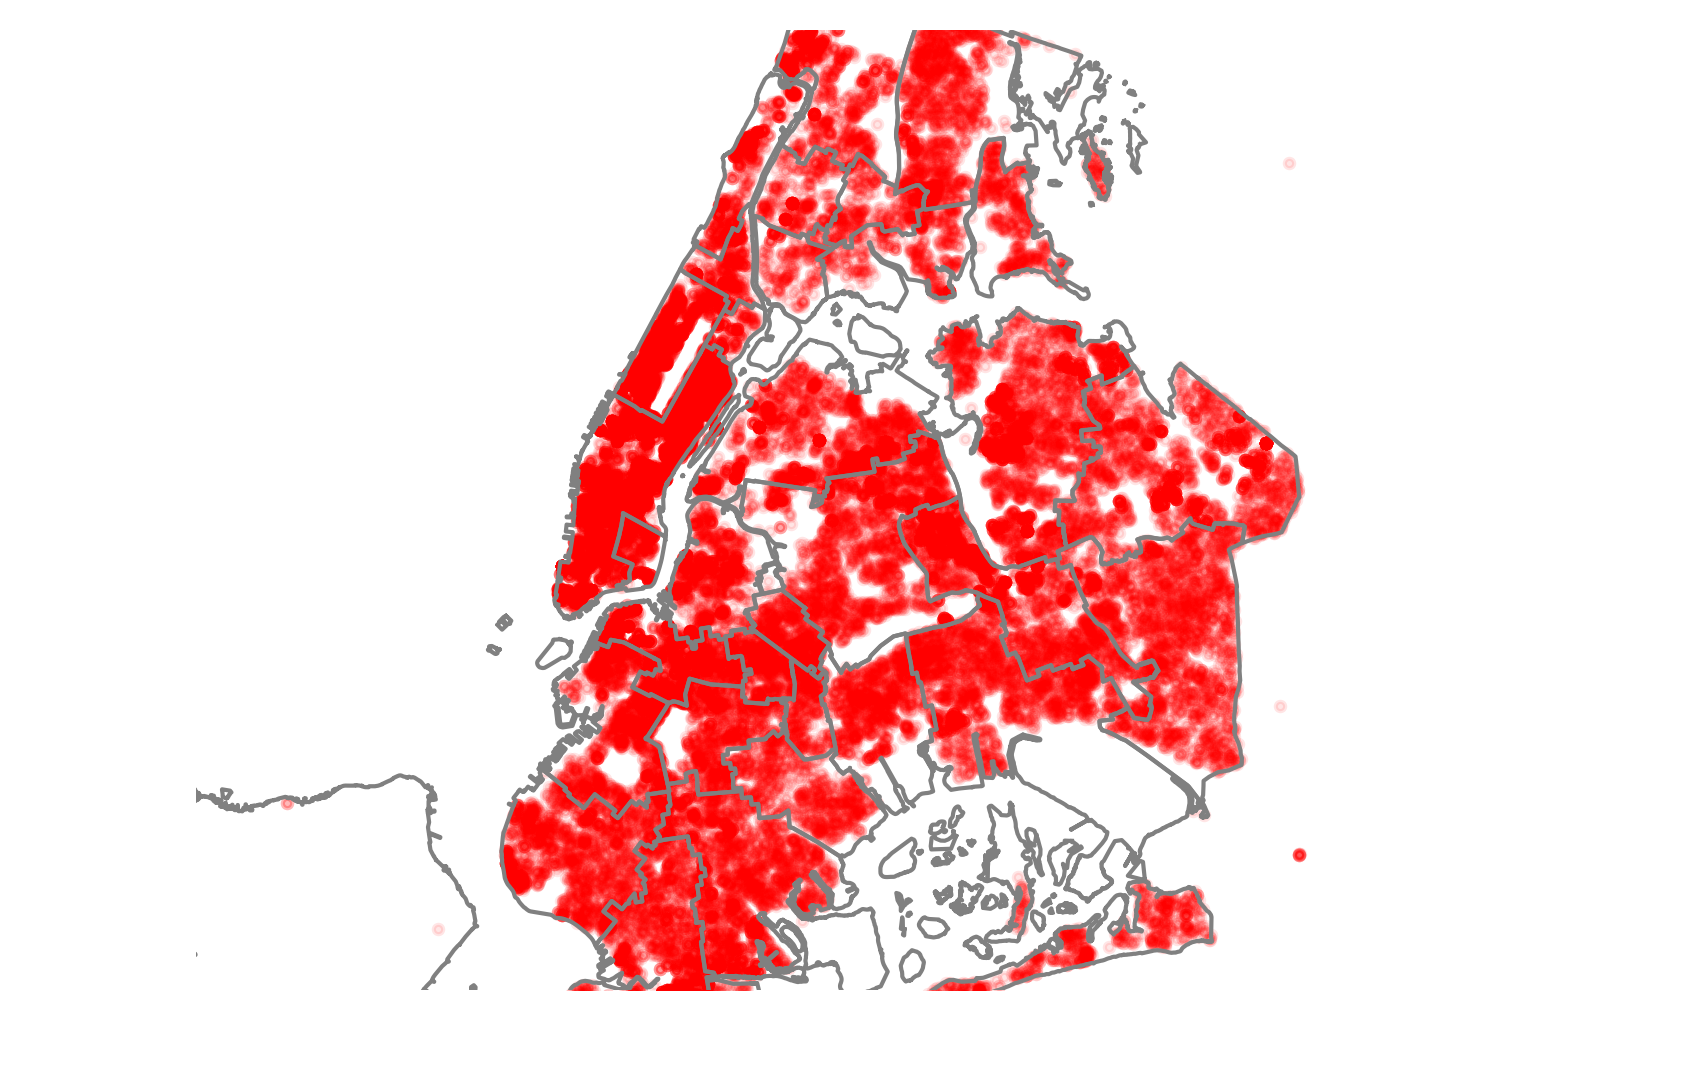

In [9]:
plt.scatter(NYC_sales[:XCoord].values, NYC_sales[:YCoord].values, marker=".", alpha=0.1, color="red")
plt.axes()[:set_aspect]("equal","datalim")
plt.xlim(percentile(NYC_sales[:XCoord].values,1),percentile(NYC_sales[:XCoord].values,99))
plt.ylim(percentile(NYC_sales[:YCoord].values,1),percentile(NYC_sales[:YCoord].values,99))
NYC_prepare_plots.background_schdistrs(plt.gca(), edgecolor="grey", linestyle="-")

# plt.axes()[:set_aspect]("equal","datalim")
# gpd.plotting[:plot_dataframe](nycdistrs, edgecolor="grey", color="None", ax=plt.gca())
# plt.axis("off")
# plt.xlim(percentile(NYC_sales[:XCoord].values,10),percentile(NYC_sales[:XCoord].values,97))
# plt.ylim(percentile(NYC_sales[:YCoord].values,10),percentile(NYC_sales[:YCoord].values,97))